# Solution comparison

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

- **edd:** earliest due date
- **ml:** maximum lateness first
- **pd:** processing time - due date (sort comparator)

In [159]:
edd = pd.read_csv("../results/edd.csv", sep=";", escapechar="\\")
ml = pd.read_csv("../results/ml.csv", sep=";", escapechar="\\")
sa = pd.read_csv("../results/sa3.csv", sep=";", escapechar="\\")
prd = pd.read_csv("../results/prd.csv", sep=";", escapechar="\\")

## Comparison function

In [5]:
def compare(first, second, name_first='First', name_second='Second'):
    print(f"Comparing {name_first} and {name_second} algorithms.")
    print()

    initial_equivalent = first.sort_values(
        by='File')['Initial Lateness'] == second.sort_values(by='File')['Initial Lateness']
    initial_equivalent.name = 'Both algorithms have equivalent initial solutions?'

    print(initial_equivalent.value_counts())
    print()

    initial_first_better = first.sort_values(
        by='File')['Initial Lateness'] < second.sort_values(by='File')['Initial Lateness']
    initial_first_better.name = f"{name_first} gave a better initial solution?"
    print(initial_first_better.value_counts())
    print()

    final_equivalent = first.sort_values(
        by='File')['Final Lateness'] == second.sort_values(by='File')['Final Lateness']
    final_equivalent.name = "Both algorithms have equivalent final solutions?"
    print(final_equivalent.value_counts())
    print()

    final_first_better = first.sort_values(
        by='File')['Final Lateness'] < second.sort_values(by='File')['Final Lateness']
    final_first_better.name = f"{name_first} gave a better solution?"
    print(final_first_better.value_counts())

    equals = first.sort_values(by='File')[['Initial Lateness', 'Final Lateness']] == second.sort_values(
        by='File')[['Initial Lateness', 'Final Lateness']]
    cm1 = equals.value_counts().unstack()

    betters = first.sort_values(by='File')[['Initial Lateness', 'Final Lateness']] < second.sort_values(
        by='File')[['Initial Lateness', 'Final Lateness']]
    cm2 = betters.value_counts().unstack()

    _, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm1, annot=True, fmt=".0f", cmap="Blues", ax=axes[0])
    axes[0].set_title("Solutions are equal")
    axes[0].set_xlabel("Final Lateness Are Equal")
    axes[0].set_ylabel("Initial Lateness Are Equal")

    sns.heatmap(cm2, annot=True, fmt=".0f", cmap="Blues", ax=axes[1])
    axes[1].set_title(f"{name_first} is better")
    axes[1].set_xlabel("Final Lateness Is better")
    axes[1].set_ylabel("Initial Lateness Is better")

    plt.tight_layout()
    plt.show()

## Results

### EDD vs ML

Comparing SA and EDD algorithms.

Both algorithms have equivalent initial solutions?
True    144
Name: count, dtype: int64

SA gave a better initial solution?
False    144
Name: count, dtype: int64

Both algorithms have equivalent final solutions?
False    144
Name: count, dtype: int64

SA gave a better solution?
False    144
Name: count, dtype: int64


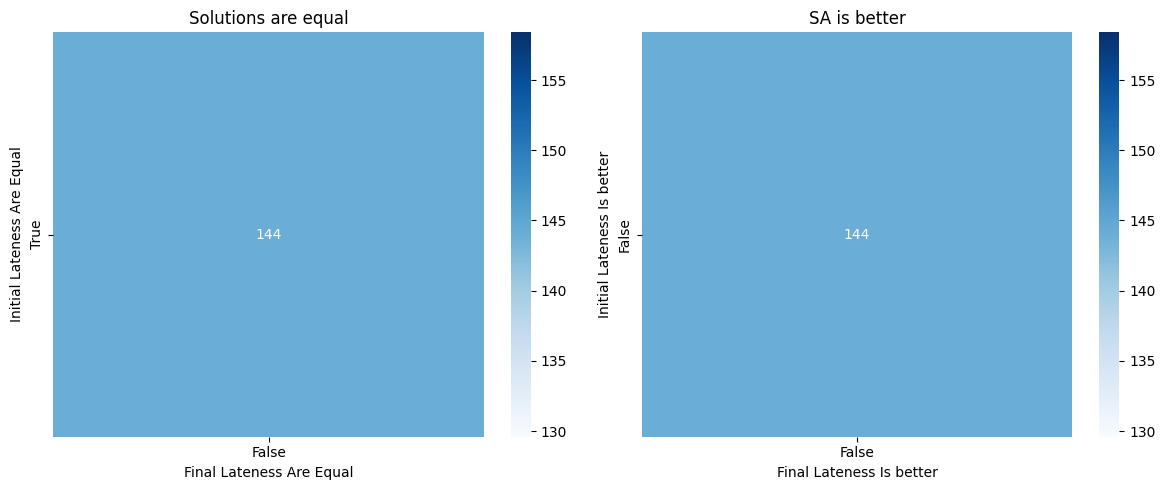

In [102]:
compare(sa, edd, "SA", "EDD")

### EDD vs PRD (Processing Time - Due Date)

Comparing EDD and PD algorithms.

Both algorithms have equivalent initial solutions?
False    118
True      26
Name: count, dtype: int64

EDD gave a better initial solution?
True     105
False     39
Name: count, dtype: int64

Both algorithms have equivalent final solutions?
False    144
Name: count, dtype: int64

EDD gave a better solution?
False    117
True      27
Name: count, dtype: int64


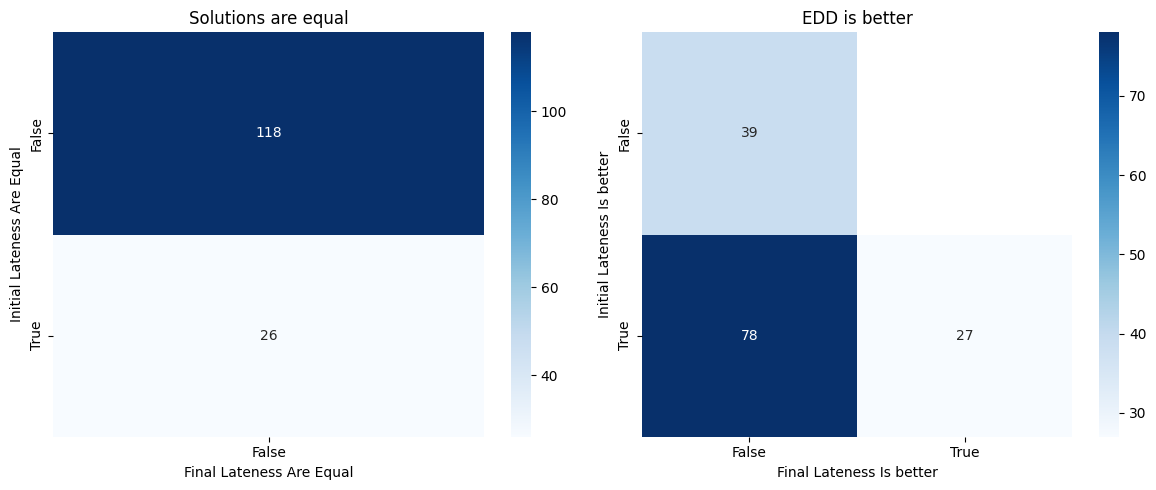

In [19]:
compare(edd, prd, "EDD", "PD")

### PRD vs ML

Comparing PRD and ML algorithms.

Both algorithms have equivalent initial solutions?
False    76
True     68
Name: count, dtype: int64

PRD gave a better initial solution?
True     73
False    71
Name: count, dtype: int64

Both algorithms have equivalent final solutions?
True     99
False    45
Name: count, dtype: int64

PRD gave a better solution?
False    128
True      16
Name: count, dtype: int64


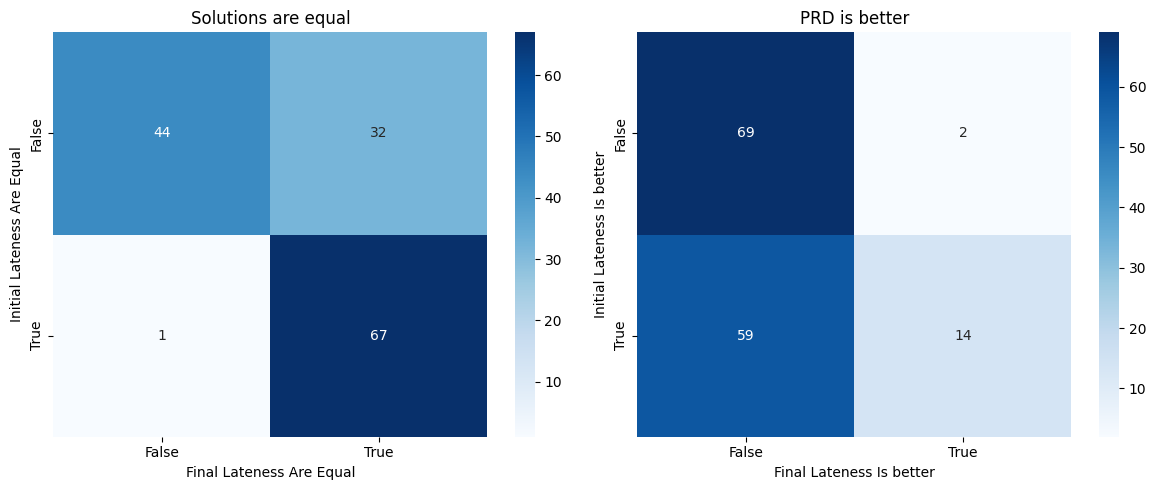

In [63]:
compare(prd, ml, "PRD", "ML")

## All Latenesses

In [162]:
def gain(execution: pd.DataFrame):
    init = execution['Initial Lateness']
    final = execution['Final Lateness']

    ratio = np.array(init - final)
    
    return ratio

all_lateness = pd.DataFrame({
    'Instance': edd['File'],
    'EDD': edd['Initial Lateness'],
    # 'PRD': prd['Initial Lateness'],
    # 'ML': ml['Initial Lateness'],
    'EDD + LS': edd['Final Lateness'],
    'EDD + SA': sa['Final Lateness'],
    'Time Gain EDD': gain(edd),
    'Time Gain SA': gain(sa),
    # 'PRD + Local Search': prd['Final Lateness'],
    # 'ML + Local Search': ml['Final Lateness'],
})
print(f"Total Time Gain LS {(gain(edd).sum()):,}")
print(f"Total Time Gain SA {(gain(sa).sum()):,}")

equivalent = (sa['Final Lateness'] == edd['Final Lateness']).sum()
different = len(edd) - equivalent
sa_better = (sa['Final Lateness'] < edd['Final Lateness']).sum()
print(f"{equivalent}/{len(edd)} equivalent solutions ({(equivalent / len(edd) * 100):.1f})%")
print(f'SA was better than LS in {sa_better} of {len(edd)} instances ({(sa_better / len(edd) * 100):.1f}%).')
print(f'SA was better than LS in {sa_better} of {different} different solutions ({(sa_better / different * 100):.1f}%).')

all_lateness

Total Time Gain LS 109,195
Total Time Gain SA 143,496
52/144 equivalent solutions (36.1)%
SA was better than LS in 72 of 144 instances (50.0%).
SA was better than LS in 72 of 92 different solutions (78.3%).


,Instance,EDD,EDD + LS,EDD + SA,Time Gain EDD,Time Gain SA
0,instances/100-2-0.5-L.txt,6686,3836,2982,2850,3704
1,instances/100-2-0.5-M.txt,5981,4265,2762,1716,3219
2,instances/100-2-0.5-S.txt,3078,2402,2288,676,790
3,instances/100-2-1.5-L.txt,1929,88,167,1841,1762
4,instances/100-2-1.5-M.txt,2314,834,539,1480,1775
...,...,...,...,...,...,...
139,instances/80-5-2.5-M.txt,1055,378,312,677,743
140,instances/80-5-2.5-S.txt,-13,-17,-13,4,0
141,instances/80-5-3.5-L.txt,-252,-278,-283,26,31
142,instances/80-5-3.5-M.txt,157,136,122,21,35


In [146]:
def gain(execution: pd.DataFrame):
    init = execution['Initial Lateness']
    final = execution['Final Lateness']

    ratio = np.array(init - final)
    
    return ratio

all_lateness = pd.DataFrame({
    'Instance': edd['File'],
    'EDD': edd['Initial Lateness'],
    # 'PRD': prd['Initial Lateness'],
    # 'ML': ml['Initial Lateness'],
    'EDD + LS': edd['Final Lateness'],
    'EDD + SA': sa['Final Lateness'],
    'Time Gain EDD': gain(edd),
    'Time Gain SA': gain(sa),
    # 'PRD + Local Search': prd['Final Lateness'],
    # 'ML + Local Search': ml['Final Lateness'],
})
print(f"Total Time Gain LS {(gain(edd).sum()):,}")
print(f"Total Time Gain SA {(gain(sa).sum()):,}")

equivalent = (sa['Final Lateness'] == edd['Final Lateness']).sum()
different = len(edd) - equivalent
sa_better = (sa['Final Lateness'] < edd['Final Lateness']).sum()
print(f"{equivalent}/{len(edd)} equivalent solutions ({(equivalent / len(edd) * 100):.1f})%")
print(f'SA was better in {sa_better} of {len(edd)} instances ({(sa_better / len(edd) * 100):.1f}%).')
print(f'SA was better in {sa_better} of {different} different solutions ({(sa_better / different * 100):.1f}%).')

all_lateness

Total Time Gain LS 109,195
Total Time Gain SA 140,867
52/144 equivalent solutions (36.1)%
SA was better in 68 of 144 instances (47.2%).
SA was better in 68 of 92 different solutions (73.9%).


,Instance,EDD,EDD + LS,EDD + SA,Time Gain EDD,Time Gain SA
0,instances/100-2-0.5-L.txt,6686,3836,2991,2850,3695
1,instances/100-2-0.5-M.txt,5981,4265,2933,1716,3048
2,instances/100-2-0.5-S.txt,3078,2402,2329,676,749
3,instances/100-2-1.5-L.txt,1929,88,167,1841,1762
4,instances/100-2-1.5-M.txt,2314,834,390,1480,1924
...,...,...,...,...,...,...
139,instances/80-5-2.5-M.txt,1055,378,261,677,794
140,instances/80-5-2.5-S.txt,-13,-17,-13,4,0
141,instances/80-5-3.5-L.txt,-252,-278,-283,26,31
142,instances/80-5-3.5-M.txt,157,136,122,21,35
